In [16]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Reshape,Activation

In [17]:
latent_dim = 64
EPOCHS = 20

In [18]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dropout(0.5),
    Dense(latent_dim)
])

In [19]:
decoder = Sequential([
    Dense(784),
    Activation('sigmoid'),
    Reshape((28,28))
])

In [20]:
img = Input(shape=(28,28))

In [21]:
latent_vec = encoder(img)
output = decoder(latent_vec)

In [22]:
model = Model(inputs = img, outputs = output)

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [24]:
mnist = tf.keras.datasets.mnist # 28x28 image of digits

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [25]:
loss_trend = []

for i in range(EPOCHS):
    print("Traing epoch {}".format(i + 1))
    model.fit(x_train,x_train,epochs=1,validation_data=(x_test,x_test),batch_size=256)
    print("Validating epoch {}".format(i + 1))
    loss_trend.append(model.evaluate(x_test,x_test))

Traing epoch 1
235/235 [==============================] - 3s 11ms/step - loss: 0.2192 - val_loss: 0.1631
Validating epoch 1
313/313 [==============================] - 0s 1ms/step - loss: 0.1631
Traing epoch 2
235/235 [==============================] - 2s 10ms/step - loss: 0.1538 - val_loss: 0.1440
Validating epoch 2
313/313 [==============================] - 1s 2ms/step - loss: 0.1440
Traing epoch 3
235/235 [==============================] - 2s 10ms/step - loss: 0.1436 - val_loss: 0.1367
Validating epoch 3
313/313 [==============================] - 0s 2ms/step - loss: 0.1367
Traing epoch 4
235/235 [==============================] - 2s 10ms/step - loss: 0.1384 - val_loss: 0.1317
Validating epoch 4
313/313 [==============================] - 0s 1ms/step - loss: 0.1317
Traing epoch 5
235/235 [==============================] - 2s 9ms/step - loss: 0.1351 - val_loss: 0.1286
Validating epoch 5
313/313 [==============================] - 0s 1ms/step - loss: 0.1286
Traing epoch 6
235/235 [=======

In [26]:
decoded = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


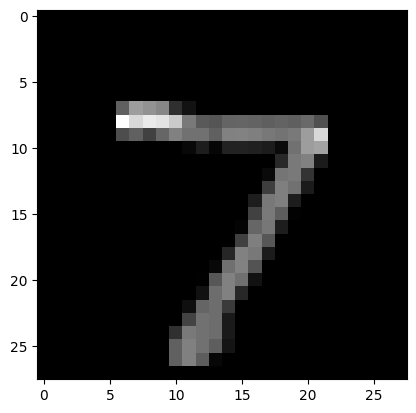

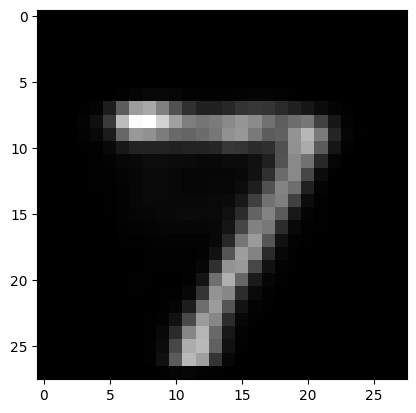

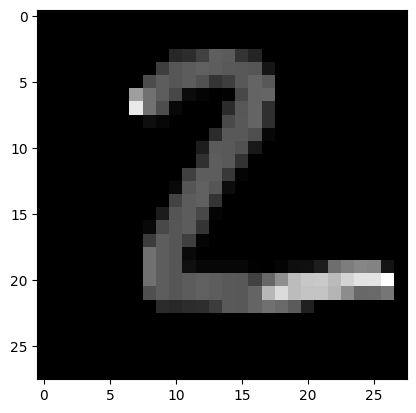

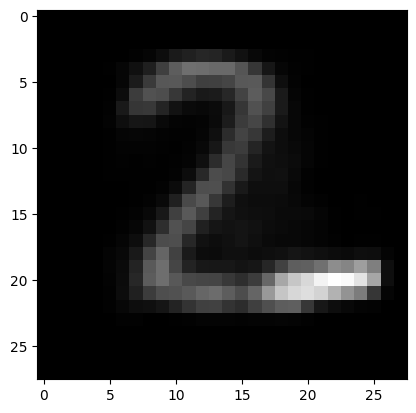

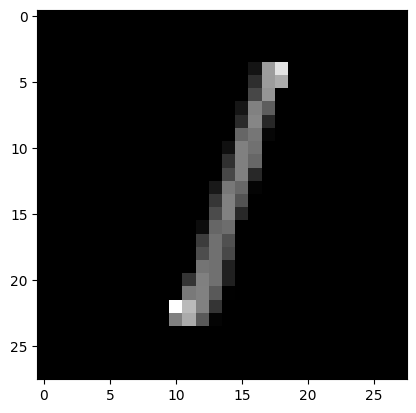

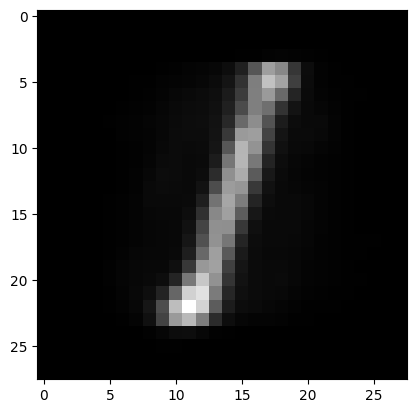

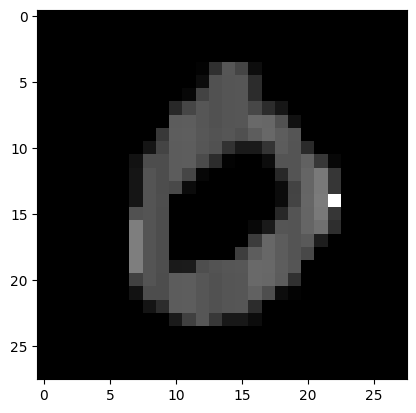

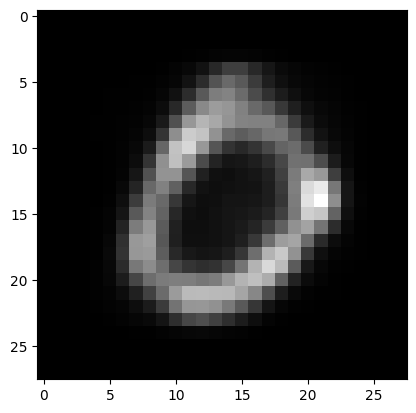

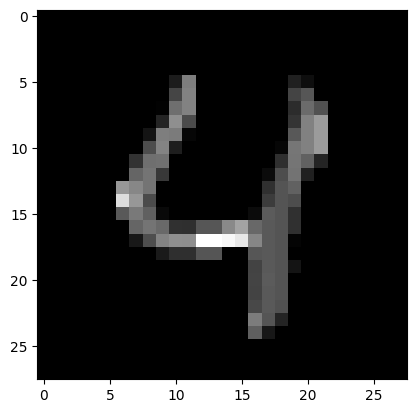

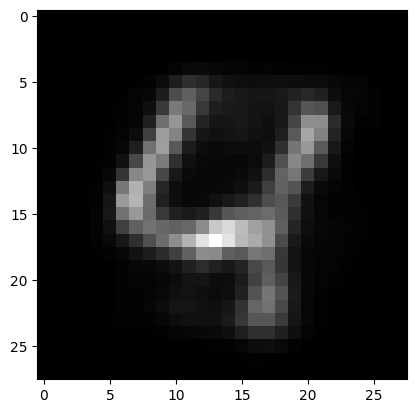

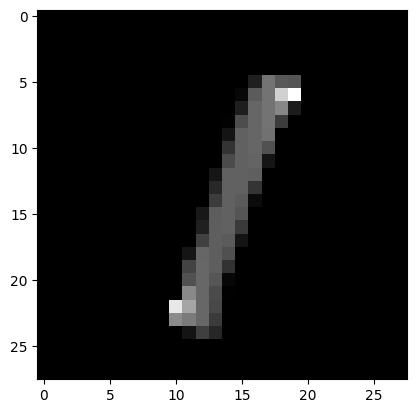

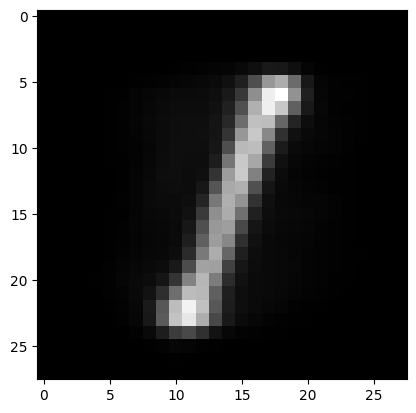

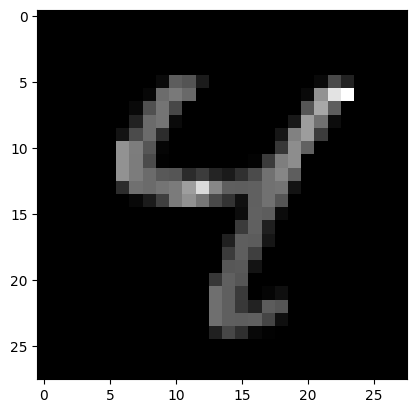

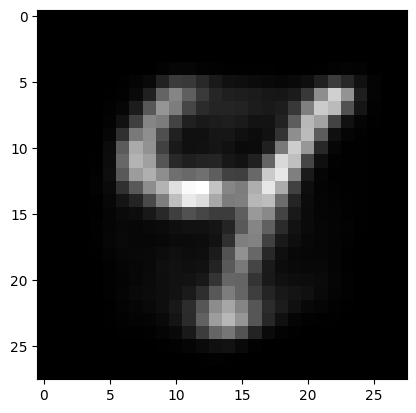

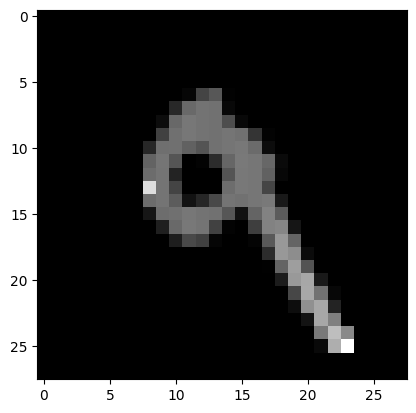

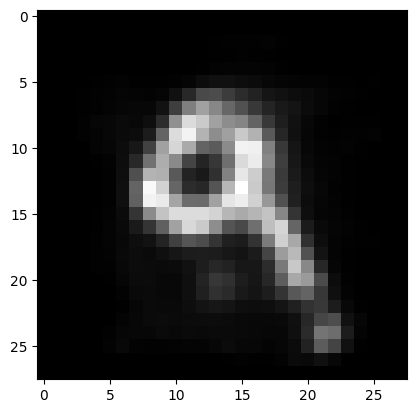

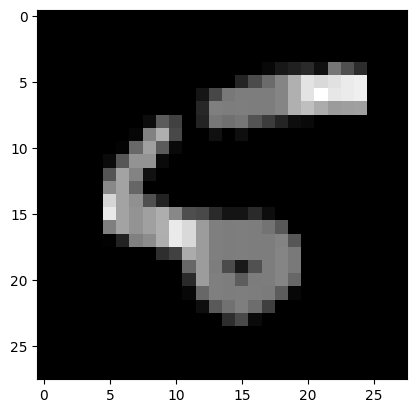

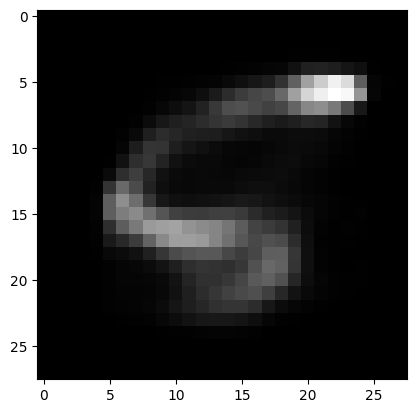

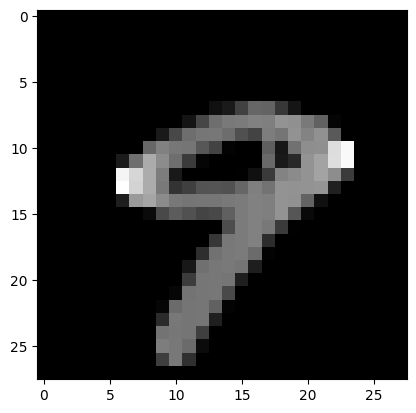

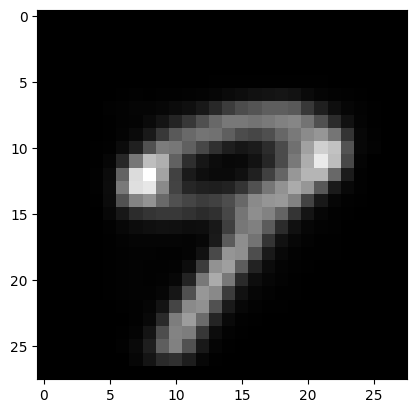

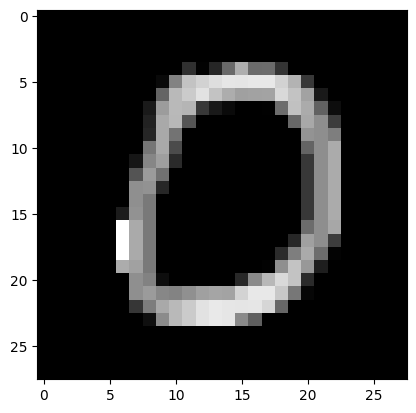

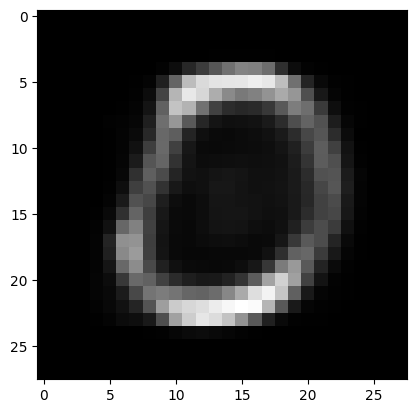

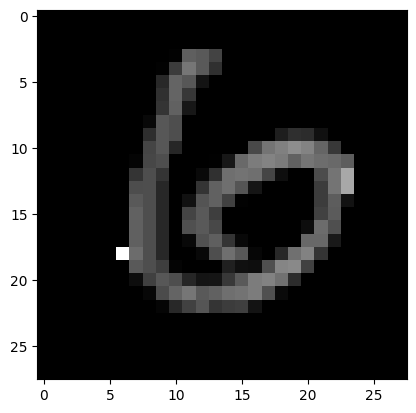

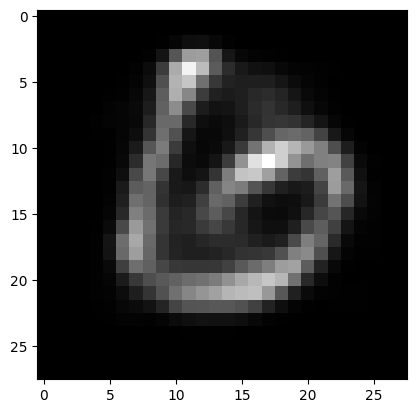

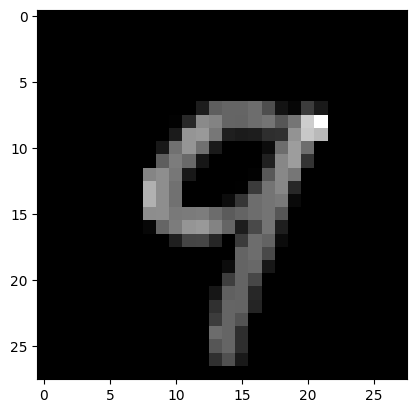

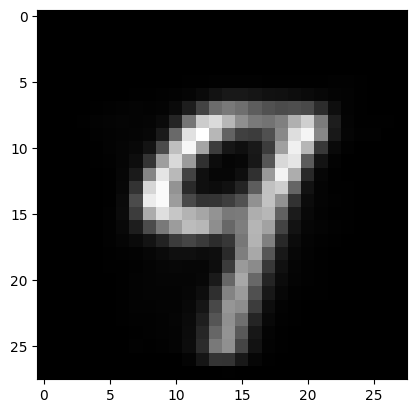

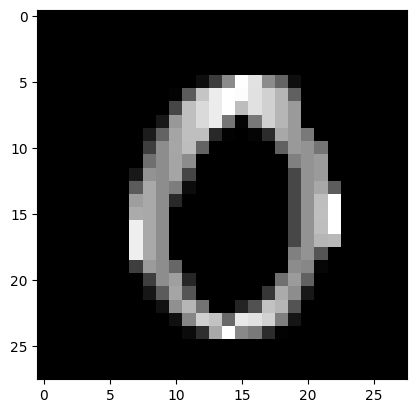

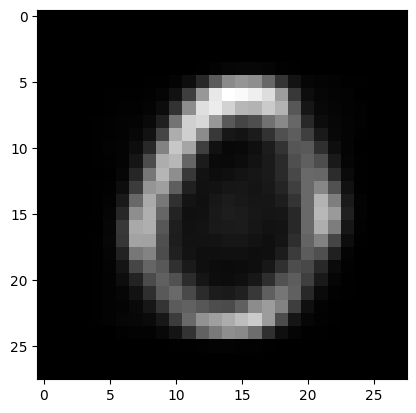

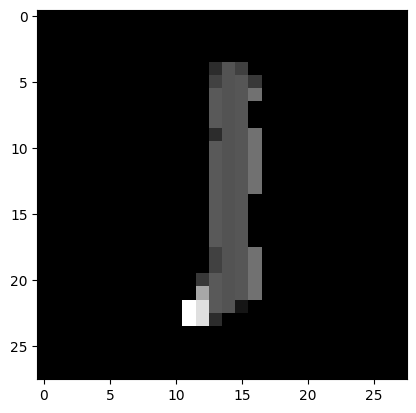

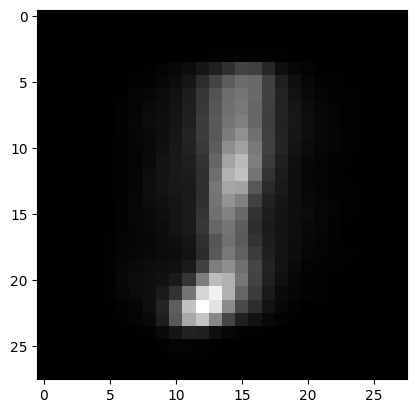

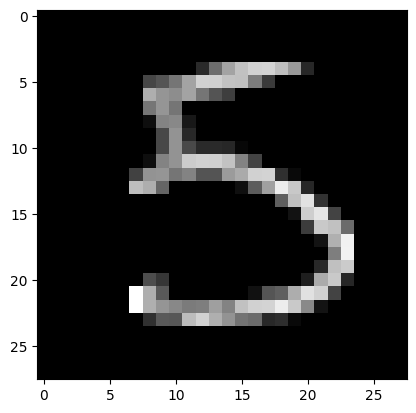

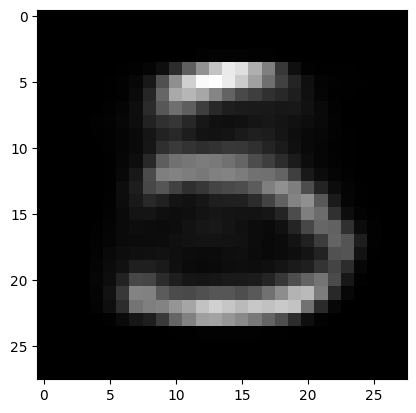

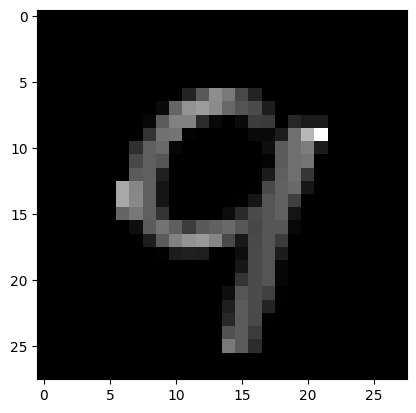

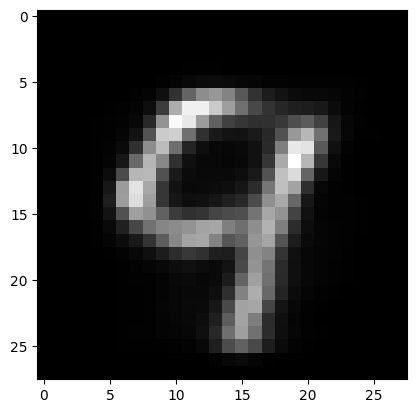

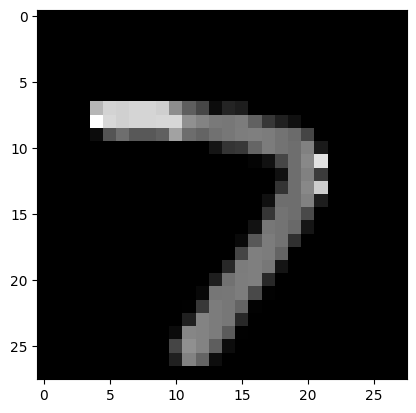

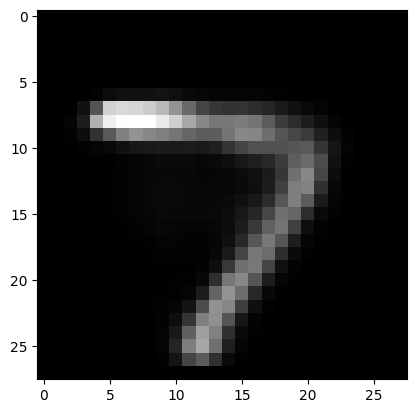

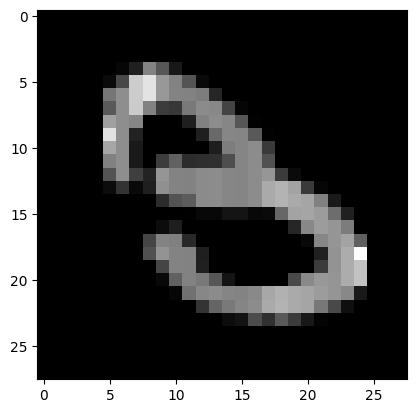

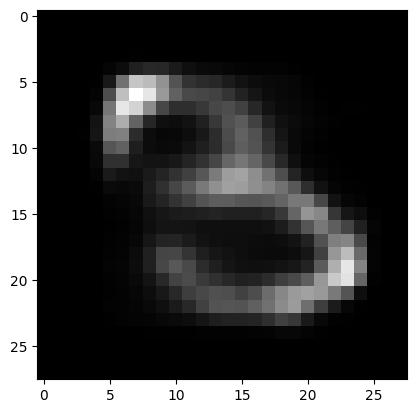

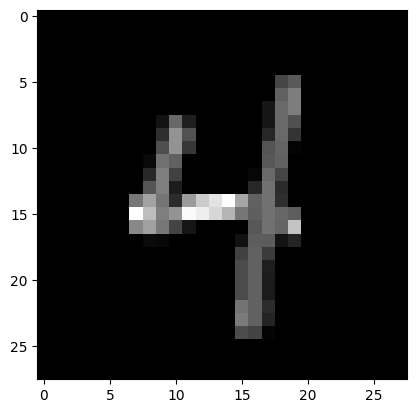

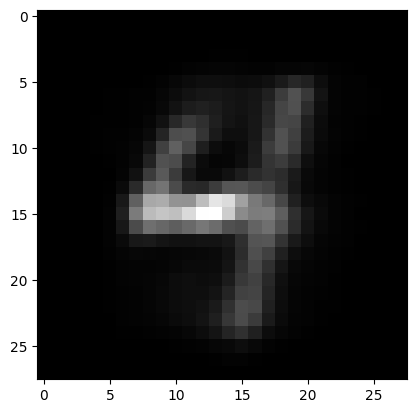

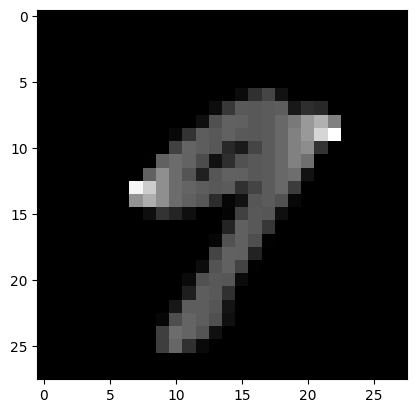

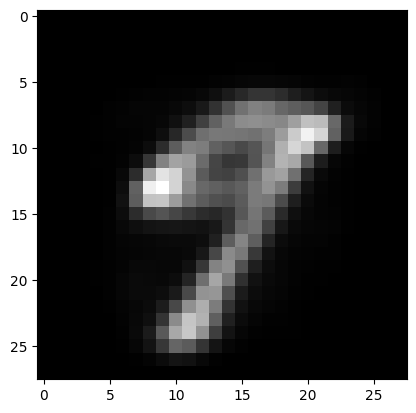

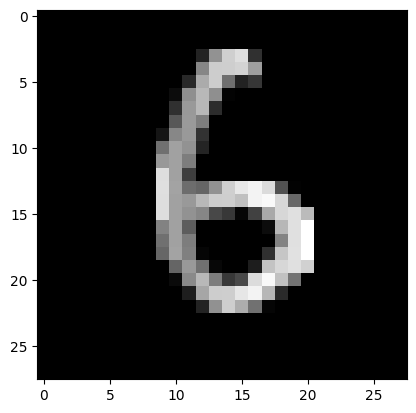

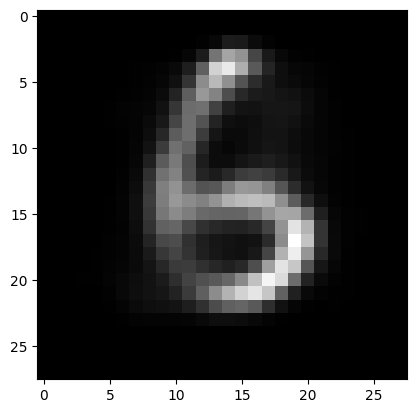

In [27]:
t = 0
for x in decoded:
    plt.imshow(x_test[t],cmap='gray')
    plt.show()
    plt.imshow(x,cmap='gray')
    plt.show()
    if(t > 20):
        break
    t += 1

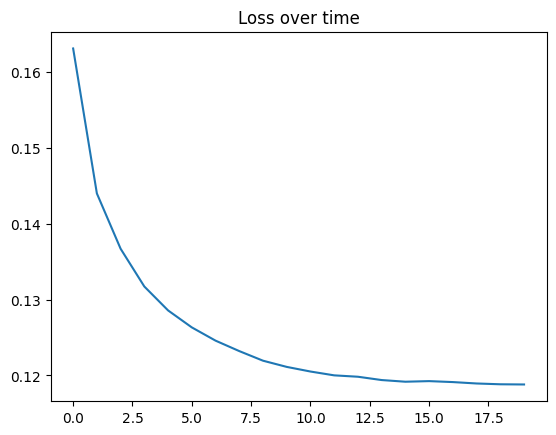

In [28]:
plt.plot(loss_trend)
plt.title('Loss over time')
plt.savefig('img/loss.png')

In [29]:
model.save('autoencoder.h5')